<a href="https://colab.research.google.com/github/mohammedterry/ANNs/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VGG-16

In [0]:
import keras

vgg_model = keras.models.Sequential()

for block,h_dim in enumerate((64,128,256,512,512),start=1):
  for layer in range(1,4):
    if layer < 3 or block > 2:
      if block==1 and layer == 1:
        vgg_model.add(keras.layers.convolutional.ZeroPadding2D((1, 1), input_shape=(224, 224, 3))) 
      else:
        vgg_model.add(keras.layers.convolutional.ZeroPadding2D((1, 1)))
      vgg_model.add(keras.layers.convolutional.Conv2D(h_dim, (3, 3), activation='relu', name=f'conv{block}_{layer}'))
  vgg_model.add(keras.layers.convolutional.MaxPooling2D((2, 2), strides=(2, 2)))
  
vgg_model.add(keras.layers.core.Flatten())
for _ in range(2):
  vgg_model.add(keras.layers.core.Dense(4096, activation='relu'))
  vgg_model.add(keras.layers.core.Dropout(.5))
vgg_model.add(keras.layers.core.Dense(1000, activation='softmax'))

In [0]:
!wget https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels.h5
vgg_model.load_weights('vgg16_weights_tf_dim_ordering_tf_kernels.h5')

In [0]:
!wget https://raw.githubusercontent.com/machrisaa/tensorflow-vgg/master/synset.txt
import numpy as np
vgg_labels = np.loadtxt('synset.txt', str, delimiter='\t')

In [0]:
vgg_model.compile(optimizer=keras.optimizers.SGD(), loss='categorical_crossentropy')

# Image Classification

In [6]:
!wget https://i.ebayimg.com/images/g/1ckAAOSwq9Rbz3AO/s-l300.jpg
!wget https://secretldn.com/wp-content/uploads/2018/03/Animals-5.jpg
!wget https://wallimpex.com/data/out/636/wild-animal-pictures-9925191.jpg
!wget https://i.pinimg.com/originals/c7/98/6c/c7986cb4b3017d976cbf17efcb184a36.jpg
!wget https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/red-wine-pouring-eli-asenova.jpg

--2019-05-16 20:16:35--  https://i.ebayimg.com/images/g/1ckAAOSwq9Rbz3AO/s-l300.jpg
Resolving i.ebayimg.com (i.ebayimg.com)... 184.27.137.127, 2600:1402:f000:593::24d4, 2600:1402:f000:58b::24d4
Connecting to i.ebayimg.com (i.ebayimg.com)|184.27.137.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10878 (11K) [image/jpeg]
Saving to: ‘s-l300.jpg’

s-l300.jpg          100%[===================>]  10.62K  --.-KB/s    in 0s      

2019-05-16 20:16:36 (200 MB/s) - ‘s-l300.jpg’ saved [10878/10878]

--2019-05-16 20:16:37--  https://secretldn.com/wp-content/uploads/2018/03/Animals-5.jpg
Resolving secretldn.com (secretldn.com)... 52.18.247.126, 52.30.73.173
Connecting to secretldn.com (secretldn.com)|52.18.247.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96907 (95K) [image/jpeg]
Saving to: ‘Animals-5.jpg’

Animals-5.jpg       100%[===================>]  94.64K  --.-KB/s    in 0.1s    

2019-05-16 20:16:37 (991 KB/s) - ‘Animals-5.jpg’ s

In [0]:
import glob
image_files = glob.glob("*.jpg")

In [0]:
batch = []

import cv2 
for image_file in image_files:
  img = cv2.imread(image_file)
  img = cv2.resize(img, (224, 224))
  batch.append(img)
  
batch = np.array(batch)

In [0]:
predictions = vgg_model.predict(batch)

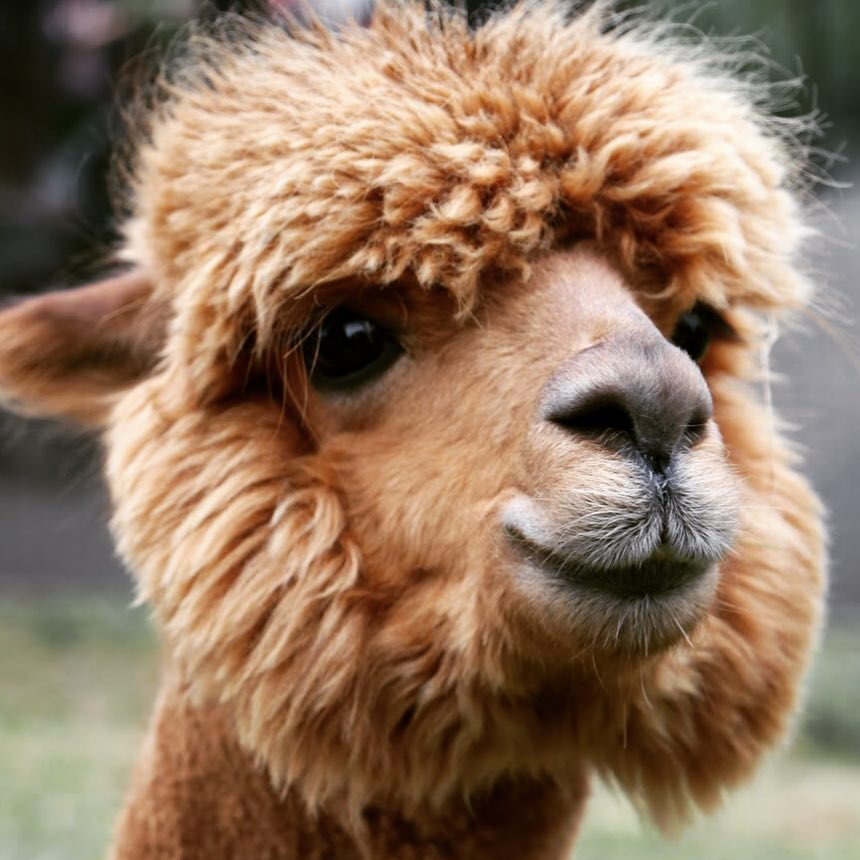

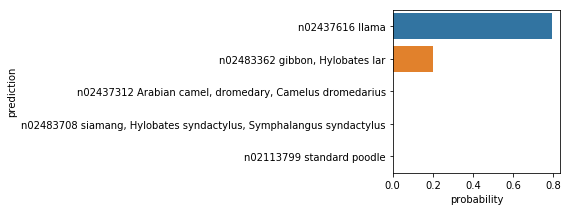

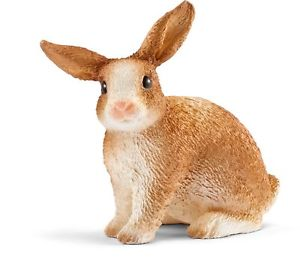

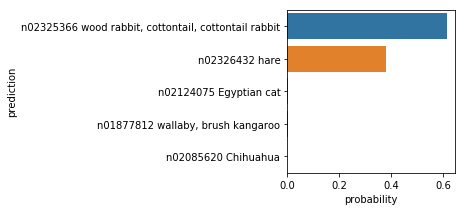

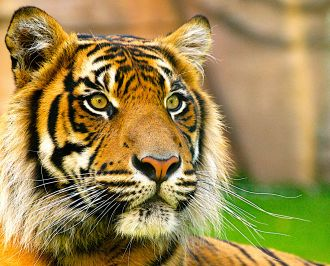

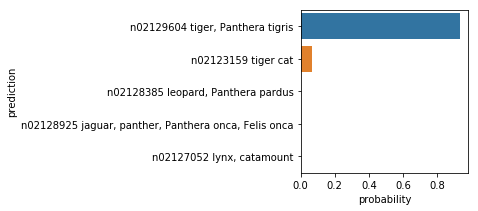

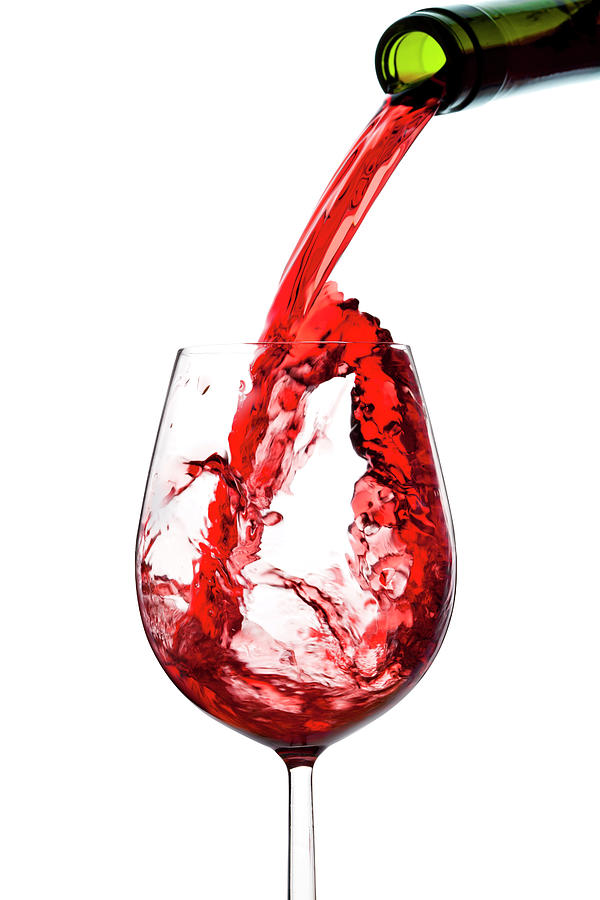

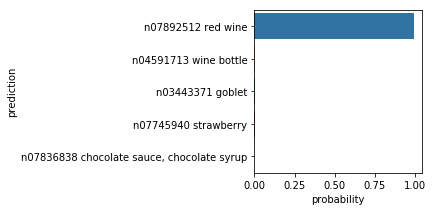

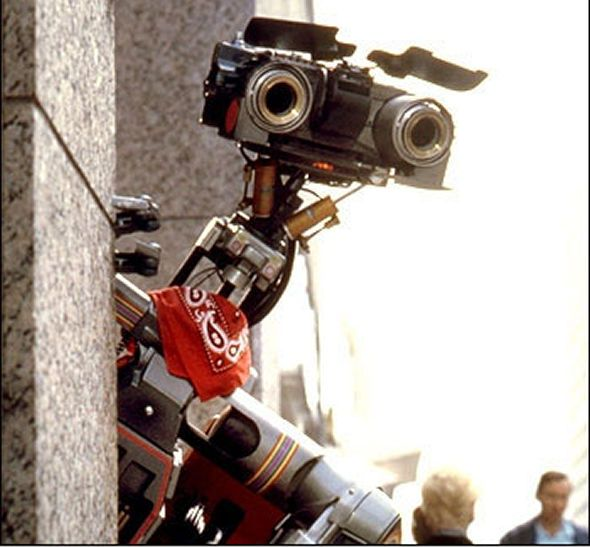

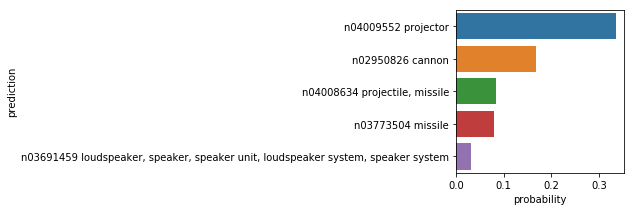

In [10]:
from IPython.display import Image, display
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (3,3)

for p,f in zip(predictions,image_files):
  display(Image(f,width=100, height=100))
  sns.barplot(x='probability', y="prediction", data=pd.DataFrame({"prediction":vgg_labels[p.argsort()[-5:][::-1]],"probability":np.sort(p)[-5:][::-1]}))
  plt.show()

# Transfer Learning

## Training Data

In [0]:
!mkdir r2d2
!wget https://www.model-space.com/media/catalog/product/cache/2/thumbnail/1280x/9df78eab33525d08d6e5fb8d27136e95/r/2/r2d2.jpg -P r2d2/
!wget https://www.sideshow.com/storage/product-images/2172/r2-d2-deluxe_star-wars_feature.jpg -P r2d2/
!wget https://www.sideshow.com/storage/product-images/400155/r2-d2_star-wars_gallery_5c4fb8c90e4b3.jpg -P r2d2/
!wget https://images-na.ssl-images-amazon.com/images/I/41IXITCtVwL.jpg -P r2d2/
!wget https://i.pinimg.com/originals/c4/33/06/c43306cc85b23e71261613b0c39acc53.jpg -P r2d2/
!wget https://ak3.picdn.net/shutterstock/videos/1022469523/thumb/9.jpg -P r2d2

!mkdir bb8
!wget https://pisces.bbystatic.com/image2/BestBuy_US/images/products/4316/4316601_sd.jpg -P bb8/
!wget https://images-na.ssl-images-amazon.com/images/I/61Af3aNllRL._SY606_.jpg -P bb8/
!wget https://lamsari.b-cdn.net/883-large_default/x-kites-skyfriends-kite-27-inch-star-wars-bb-8.jpg -P bb8/
!wget https://cdn.shopify.com/s/files/1/0839/7001/products/star-wars_large.jpg -P bb8/
!wget https://s1.thcdn.com/productimg/960/960/11175941-3044332451327890.jpg -P bb8/
!wget https://www.geek.com/wp-content/uploads/2015/04/bb-8-star-wars-the-force-awakens-featured-625x350.jpg -P bb8/
  
!mkdir c3po
!wget https://www.syfy.com/sites/syfy/files/styles/1200x680/public/wire/legacy/images/c3po-star-wars.jpg -P c3po/
!wget https://lovelace-media.imgix.net/uploads/640/b74767c0-0df3-0133-f4d2-0e18518aac2f.jpg -P c3po/
!wget https://www.machinegun.fr/products_img/21094/C_6.jpg -P c3po/
!wget https://1.bp.blogspot.com/-fjzPPlqbk2o/TYIiouxCK4I/AAAAAAAADFw/B6PKMe8zUOQ/s1600/18.jpg -P c3po/
!wget https://starwarsblog.starwars.com/wp-content/uploads/2017/01/c3po-attack-clones.jpg -P c3po/
!wget https://jerem77.files.wordpress.com/2015/04/c3po.jpg -P c3po/
  
!mkdir k2so
!wget https://i.ebayimg.com/images/g/5R0AAOSwFyhZ62xc/s-l640.jpg -P k2so/
!wget https://img2.cgtrader.com/items/1857667/512480c096/large/k2so-starwars-droid-3d-model-max-obj-mtl-fbx.jpg -P k2so/
!wget https://cdn3.movieweb.com/i/article/MGQuGU0VeLAqV8bTvjG5ntSBxxkcov/798:50/Rogue-One-Droid-K2so-More-Star-Wars-Movies.jpg -P k2so/
!wget https://i.ytimg.com/vi/OI2W9JOKiu8/maxresdefault.jpg -P k2so/
!wget https://www.sideshow.com/wp/wp-content/uploads/2017/04/k2so.jpg -P k2so/
!wget https://images-na.ssl-images-amazon.com/images/I/41Jus1rKeTL.jpg -P k2so/

!mkdir j5
!wget https://billsmovieemporium.wordpress.com/files/2009/01/shortcircuit6.jpg -P j5/
!wget https://cdn.sparkfun.com/assets/home_page_posts/2/0/9/5/scirc12h.jpg -P j5/
!wget https://www.3dartistonline.com/users/64843/thm1024/1470033692_Johnny52k_g22_v2.jpg -P j5/
!wget http://i165.photobucket.com/albums/u47/catbat74/Johnny5.jpg -P j5/
!wget https://i2-prod.mirror.co.uk/incoming/article8320224.ece/ALTERNATES/s615b/Johnny-Five.jpg -P j5/
!wget https://d13ezvd6yrslxm.cloudfront.net/wp/wp-content/images/shortcircuit.jpg -P j5/

In [0]:
r2d2 = glob.glob("r2d2/*.jpg")
bb8 = glob.glob("bb8/*.jpg")
c3po = glob.glob("c3po/*.jpg")
k2so = glob.glob("k2so/*.jpg")
j5 = glob.glob("j5/*.jpg")
test_images = [r2d2[0],bb8[0],c3po[0],k2so[0],j5[0]]
train_images = r2d2[1:] + bb8[1:] + c3po[1:] + k2so[1:] + j5[1:]
train_labels = [img_name.split('/')[0] for img_name in train_images]

## Embed Images using VGG-16 (x)

In [0]:
def embed_images(image_files, embedding_model):
  batch = []
  for image_file in image_files:
    img = cv2.imread(image_file)
    img = cv2.resize(img, (224, 224))
    batch.append(img)
  batch = np.array(batch)
  return embedding_model.predict(batch)

In [0]:
for _ in range(5):
  vgg_model.pop()
vgg_model.compile(optimizer=keras.optimizers.SGD(), loss='categorical_crossentropy')

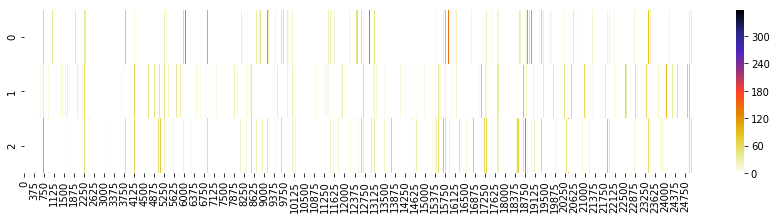

In [73]:
image_vectors = embed_images(train_images, vgg_model)

plt.rcParams["figure.figsize"] = (15,3)
sns.heatmap(image_vectors[:3], cmap="CMRmap_r")

In [0]:
image_vectors_test = embed_images(test_images, vgg_model)

## One-hot encode labels (y)

In [0]:
def one_hot(i, vec_len):
  vector = [0]*vec_len
  vector[i] = 1
  return vector

idx_label = dict(enumerate(set(train_labels)))
label_idx = {label:i for i,label in idx_label.items()}
N_CLASSES = len(label_idx)
label_vectors = [one_hot(label_idx[label], N_CLASSES) for label in train_labels]

## FFNN classifier

In [98]:
from sklearn.neural_network import MLPClassifier

ffnn = MLPClassifier(hidden_layer_sizes=([1000]*5)) 
ffnn.fit(image_vectors,label_vectors)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[1000, 1000, 1000, 1000, 1000],
       learning_rate='constant', learning_rate_init=0.001, max_iter=200,
       momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
       power_t=0.5, random_state=None, shuffle=True, solver='adam',
       tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
predictions = ffnn.predict(image_vectors_test)

?


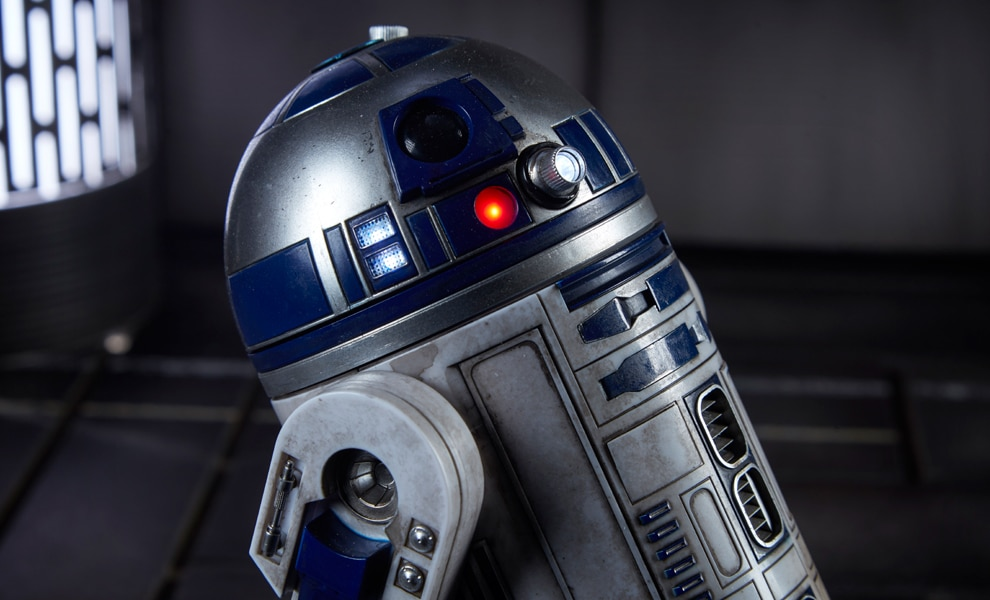

bb8


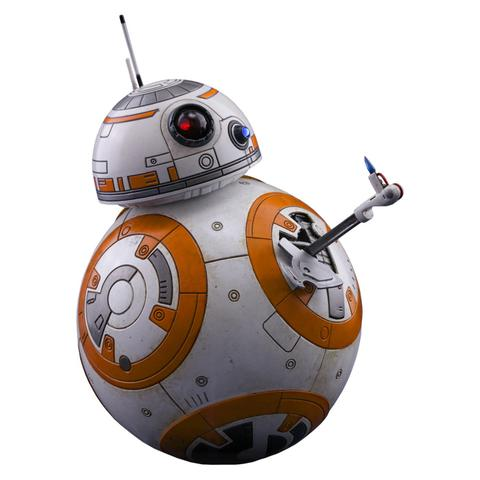

c3po


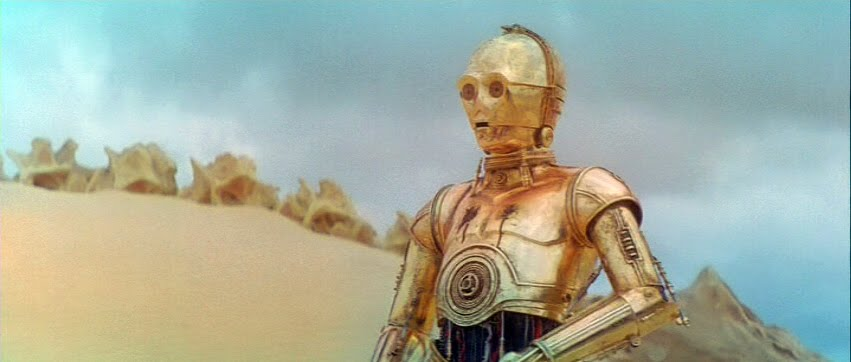

k2so


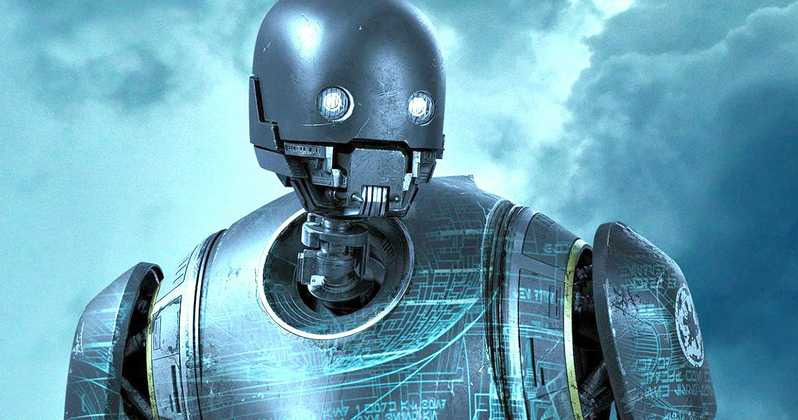

k2so


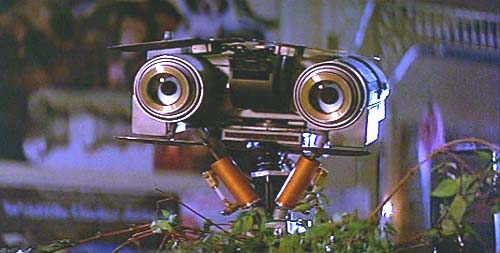

In [100]:
for label_vector, filename in zip(predictions, test_images):
  if sum(label_vector) == 0:
    print("?")
  else:
    idx = np.argmax(label_vector)
    print(idx_label[idx])
  display(Image(filename, width=100, height=100))

## Gradient boost classifier

In [105]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier

xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(image_vectors, [label_idx[label] for label in train_labels])


OneVsRestClassifier(estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          n_jobs=None)

In [0]:
predictions = xgb_classifier.predict(image_vectors_test)

r2d2


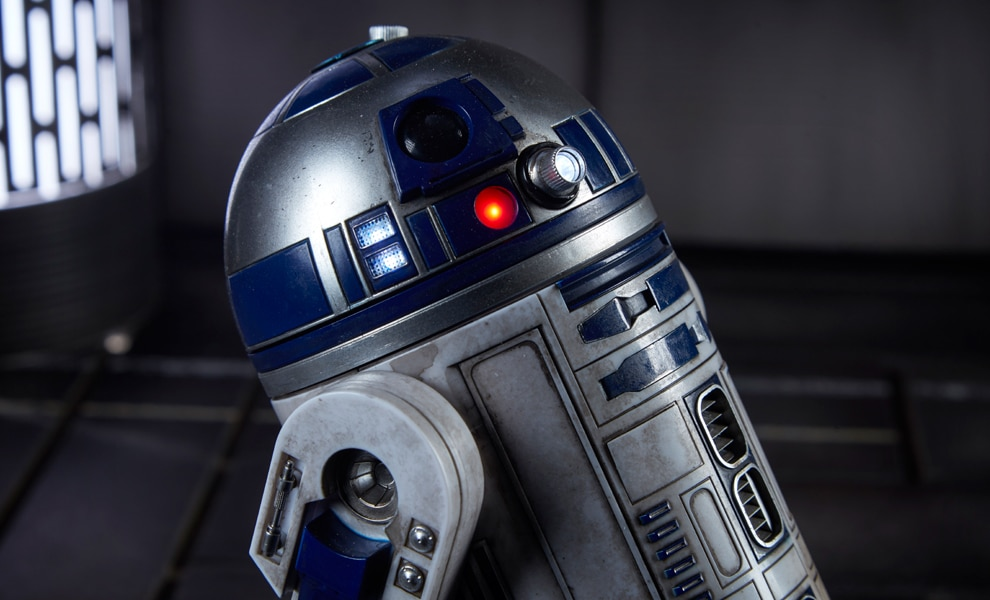

bb8


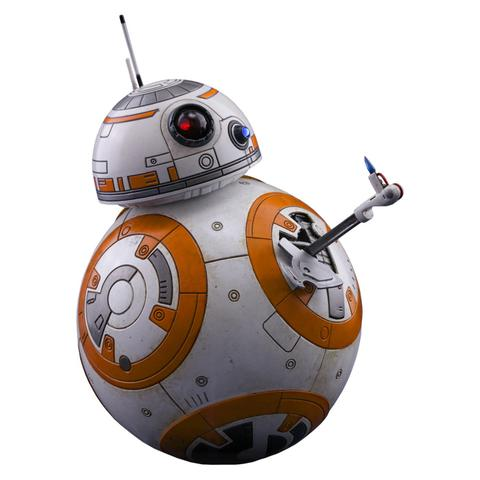

k2so


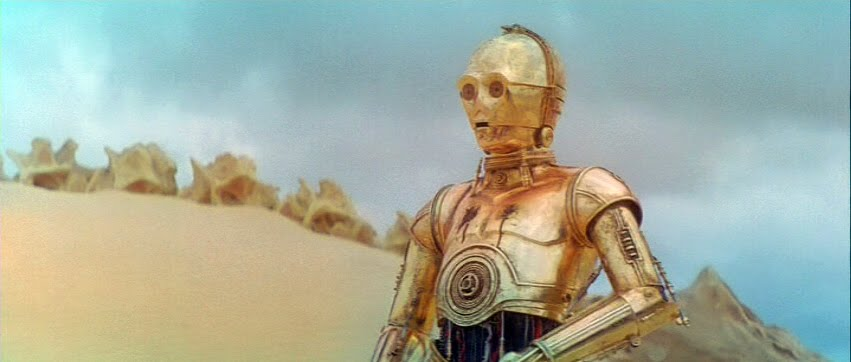

k2so


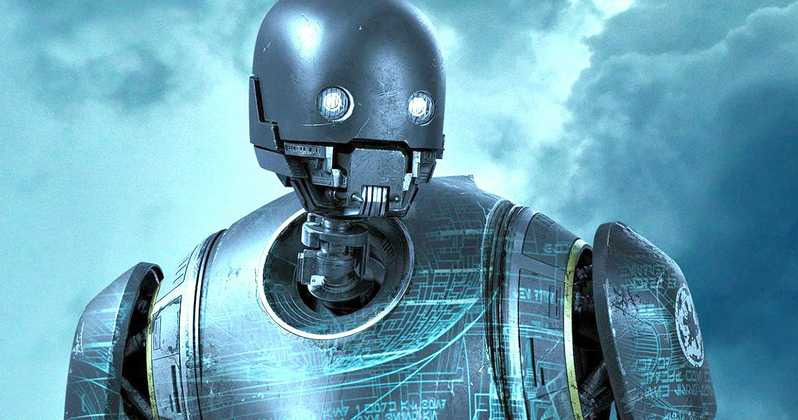

j5


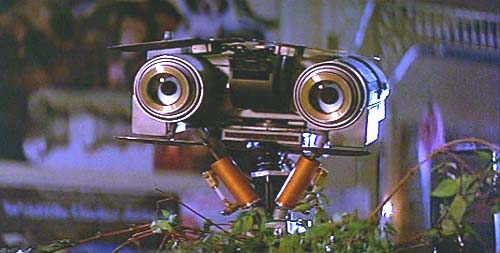

In [108]:
for idx, filename in zip(predictions, test_images):
  print(idx_label[idx])
  display(Image(filename, width=100, height=100))